<a href="https://colab.research.google.com/github/Anantbir-S/AER850_Project2/blob/main/Works_with_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Epoch 1/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5563 - loss: 1.4858 - val_accuracy: 0.3921 - val_loss: 1.1609
Epoch 2/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6695 - loss: 0.7206 - val_accuracy: 0.3921 - val_loss: 1.1529
Epoch 3/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.7224 - loss: 0.6181 - val_accuracy: 0.4339 - val_loss: 1.0538
Epoch 4/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7236 - loss: 0.6136 - val_accuracy: 0.4200 - val_loss: 1.1122
Epoch 5/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.7527 - loss: 0.5720 - val_accuracy: 0.5777 - val_loss: 0.8977
Epoch 6/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.7703 - loss: 0.5259 - val_accuracy: 0.6404 - val_loss: 0.7735
Epoch 7/15
61/61 ━━━━━━━━━

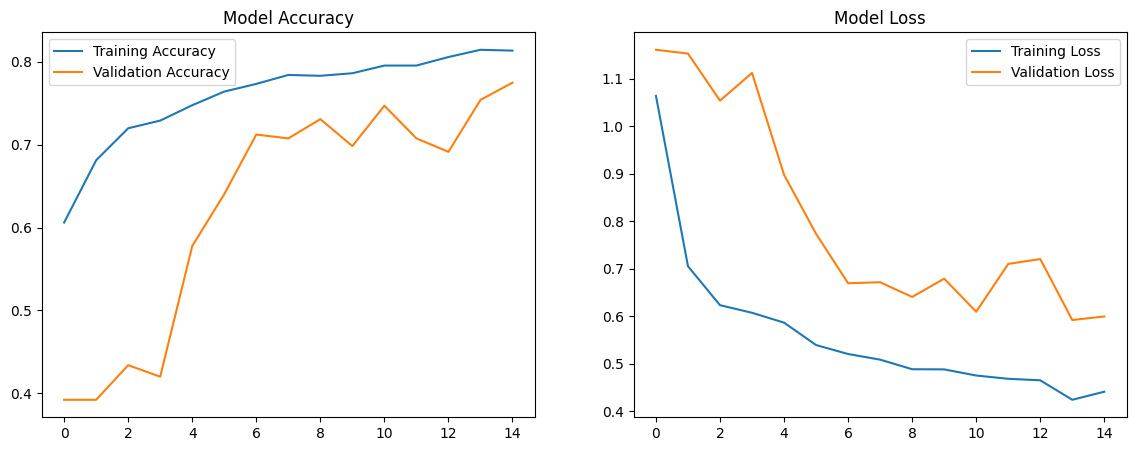

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, mixed_precision
import matplotlib.pyplot as plt
from google.colab import drive

# Enable mixed precision for faster computation on compatible GPUs
mixed_precision.set_global_policy('mixed_float16')

# Mount Google Drive
drive.mount('/content/drive')

# Paths for Google Colab
base_dir = '/content/drive/MyDrive/Project 2 Data/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Image dimensions and batch size
input_image_shape = (500, 500, 3)
img_size = (500, 500)
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.18,
    rotation_range=26,
    horizontal_flip=True
)

# Rescaling for validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators with consistent target size
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the Neural Network Architecture
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_image_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Increased dense layer size
    layers.BatchNormalization(),


    layers.Dense(3, activation='softmax', dtype='float32')  # Specify float32 for final layer with mixed precision
])

# Compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for Early Stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=valid_generator,
    callbacks=callbacks
)

# Model Evaluation - Plot Accuracy and Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.5804 - loss: 1.2627 - val_accuracy: 0.4269 - val_loss: 1.4829
Epoch 2/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6887 - loss: 0.6903 - val_accuracy: 0.3968 - val_loss: 1.2576
Epoch 3/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6989 - loss: 0.6423 - val_accuracy: 0.3991 - val_loss: 1.1450
Epoch 4/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7332 - loss: 0.5802 - val_accuracy: 0.5220 - val_loss: 1.0095
Epoch 5/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.7622 - loss: 0.5516 - val_accuracy: 0.6148 - val_loss: 0.8224
Epoch 6/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.7758 - loss: 0.5252 - val_accuracy: 0.6473 - val_loss: 0.7499
Epoch 7/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7506 - loss: 0.5605 - val_accuracy: 0.5824 - val_loss: 0.9035
Epoch 8/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7737 - loss: 0.5333 - val_accuracy: 0.6311 - v

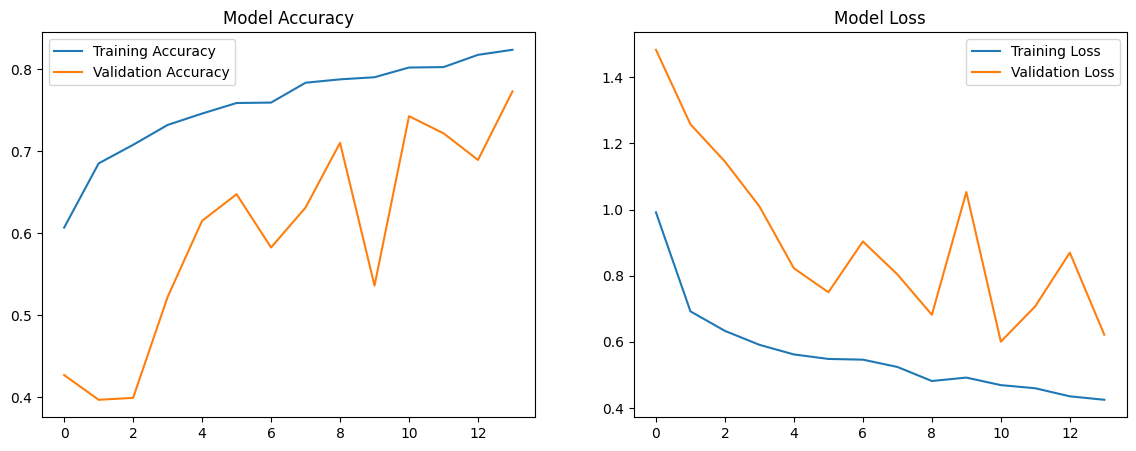

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, mixed_precision
import matplotlib.pyplot as plt
from google.colab import drive

# Enable mixed precision for faster computation on compatible GPUs
mixed_precision.set_global_policy('mixed_float16')

# Mount Google Drive
drive.mount('/content/drive')

# Paths for Google Colab
base_dir = '/content/drive/MyDrive/Project 2 Data/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Image dimensions and batch size
input_image_shape = (500, 500, 3)
img_size = (500, 500)
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.18,
    rotation_range=26,
    horizontal_flip=True
)

# Rescaling for validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators with consistent target size
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the Neural Network Architecture without Dropout
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_image_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(3, activation='softmax', dtype='float32')  # Specify float32 for final layer with mixed precision
])

# Compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for Early Stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=valid_generator,
    callbacks=callbacks
)

# Model Evaluation - Plot Accuracy and Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


Mounted at /content/drive
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 913s 13s/step - accuracy: 0.3663 - loss: 1.2289 - val_accuracy: 0.4408 - val_loss: 1.0785
Epoch 2/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.4097 - loss: 1.0400 - val_accuracy: 0.4780 - val_loss: 1.0688
Epoch 3/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.4379 - loss: 1.0188 - val_accuracy: 0.4965 - val_loss: 1.0283
Epoch 4/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.4506 - loss: 0.9890 - val_accuracy: 0.6288 - val_loss: 1.0282
Epoch 5/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.4945 - loss: 0.9609 - val_accuracy: 0.4965 - val_loss: 0.9637
Epoch 6/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.4971 - loss: 0.9469 - val_accuracy: 0.4826 - val_loss: 0.9734
Epoch 7/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.4737 - loss: 0.9324 - val_accuracy: 0.5360 - val_loss: 0.9070
Epoch 8/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.5076 - loss: 0.9255 - val_accuracy: 0.6265 - val_loss: 0.

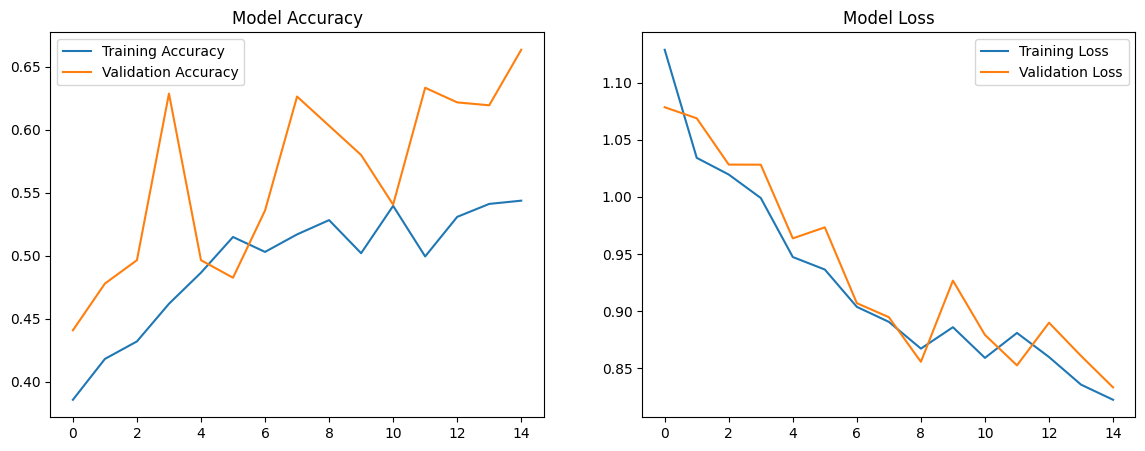

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, mixed_precision
import matplotlib.pyplot as plt
from google.colab import drive

# Enable mixed precision for faster computation on compatible GPUs
mixed_precision.set_global_policy('mixed_float16')

# Mount Google Drive
drive.mount('/content/drive')

# Paths for Google Colab
base_dir = '/content/drive/MyDrive/Project 2 Data/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Image dimensions and batch size
input_image_shape = (500, 500, 3)
img_size = (500, 500)
batch_size = 32

# Moderate data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    rotation_range=15,
    horizontal_flip=True
)

# Rescaling for validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define a simpler Neural Network Architecture
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_image_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),  # Light dropout to prevent overfitting

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),  # Reduced dense layer size
    layers.Dropout(0.4),  # Light dropout before the output layer

    layers.Dense(3, activation='softmax', dtype='float32')  # Specify float32 for final layer with mixed precision
])

# Compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for Early Stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=valid_generator,
    callbacks=callbacks
)

# Model Evaluation - Plot Accuracy and Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5501 - loss: 1.8908 - val_accuracy: 0.3921 - val_loss: 1.1191
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7041 - loss: 0.6745 - val_accuracy: 0.3921 - val_loss: 1.2393
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7288 - loss: 0.6091 - val_accuracy: 0.3921 - val_loss: 1.2516
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7307 - loss: 0.5887 - val_accuracy: 0.3921 - val_loss: 1.3691


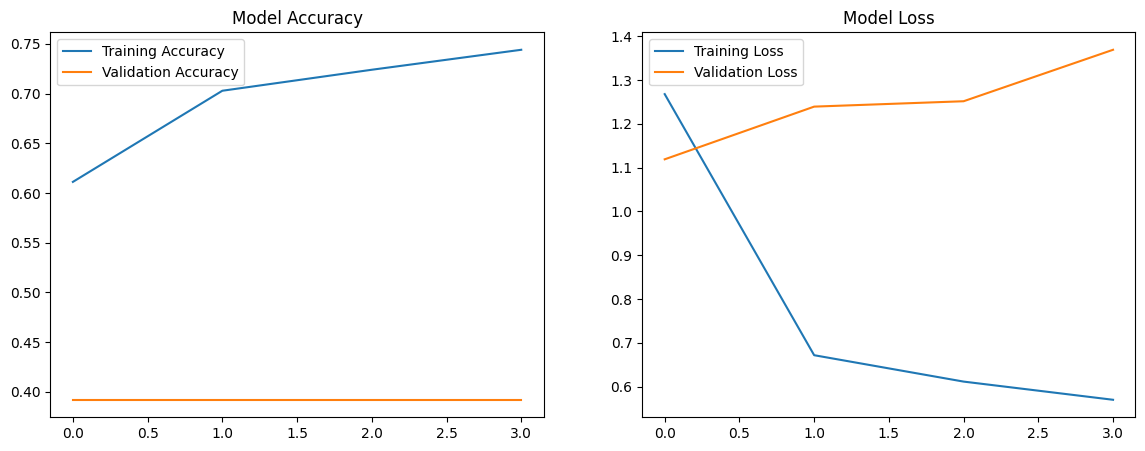

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, mixed_precision
import matplotlib.pyplot as plt
from google.colab import drive

# Enable mixed precision for faster computation on compatible GPUs
mixed_precision.set_global_policy('mixed_float16')

# Mount Google Drive
drive.mount('/content/drive')

# Paths for Google Colab
base_dir = '/content/drive/MyDrive/Project 2 Data/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Image dimensions and batch size
input_image_shape = (300, 300, 3)
img_size = (300, 300)
batch_size = 64

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=28,
    horizontal_flip=True
)

# Rescaling for validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators with consistent target size
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the Neural Network Architecture without Dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_image_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(3, activation='softmax', dtype='float32')  # Specify float32 for final layer with mixed precision
])

# Compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for Early Stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=callbacks
)

# Model Evaluation - Plot Accuracy and Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Epoch 1/12
122/122 ━━━━━━━━━━━━━━━━━━━━ 52s 337ms/step - accuracy: 0.6038 - loss: 1.0015 - val_accuracy: 0.3921 - val_loss: 1.1517
Epoch 2/12
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 306ms/step - accuracy: 0.6789 - loss: 0.7008 - val_accuracy: 0.4176 - val_loss: 1.2141
Epoch 3/12
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 310ms/step - accuracy: 0.7092 - loss: 0.6552 - val_accuracy: 0.5220 - val_loss: 1.0073
Epoch 4/12
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 307ms/step - accuracy: 0.7382 - loss: 0.6172 - val_accuracy: 0.6218 - val_loss: 0.7943
Epoch 5/12
122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 306ms/step - accuracy: 0.7407 - loss: 0.5772 - val_accuracy: 0.6845 - val_loss: 0.7010
Epoch 6/12
122/122 ━━━━━━━━━━━━━━━━━━━━ 39s 305ms/step - accuracy: 0.7595 - loss: 0.5517 - val_accuracy: 0.7216 - val_loss: 0.7119
Ep

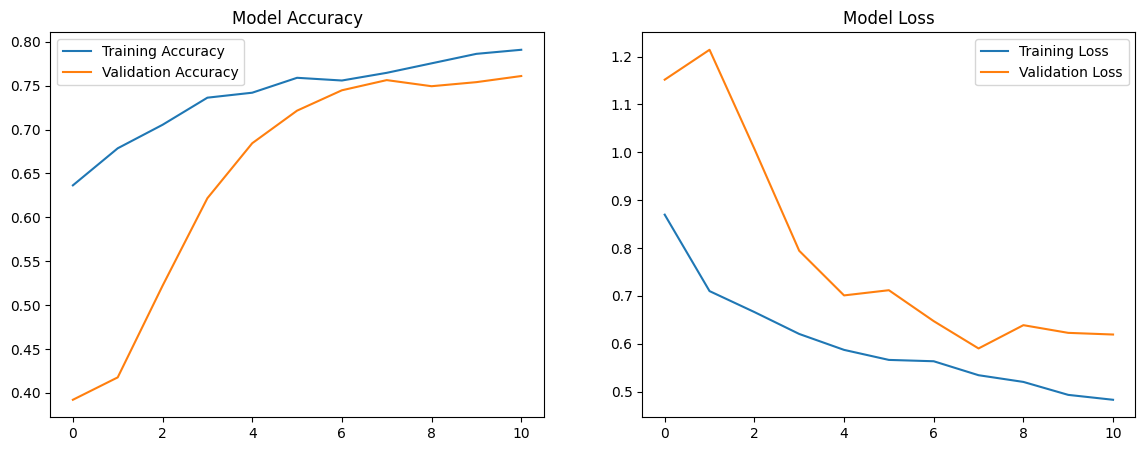

In [9]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, mixed_precision
import matplotlib.pyplot as plt
from google.colab import drive

# Enable mixed precision for faster computation on compatible GPUs
mixed_precision.set_global_policy('mixed_float16')

# Mount Google Drive
drive.mount('/content/drive')

# Paths for Google Colab
base_dir = '/content/drive/MyDrive/Project 2 Data/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Image dimensions and batch size
input_image_shape = (300, 300, 3)
img_size = (300, 300)
batch_size = 16

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=24,
    horizontal_flip=True
)

# Rescaling for validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators with consistent target size
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the Neural Network Architecture without Dropout
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_image_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(3, activation='softmax', dtype='float32')  # Specify float32 for final layer with mixed precision
])

# Compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for Early Stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=12,
    validation_data=valid_generator,
    callbacks=callbacks
)

# Model Evaluation - Plot Accuracy and Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

model.save('/content/drive/MyDrive/Project 2 Data/modeltest3.keras')